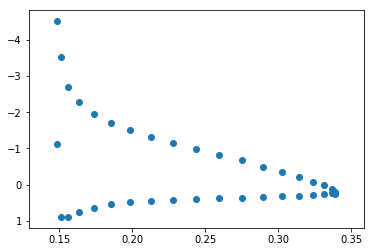

In [1]:
from typing import List, Dict
import matplotlib.pyplot as plt


#Split *.Ou file by string list, dict key is AoA
def Split_Section_AoA(fname:str)->Dict[float,List[str]]:
    f = None
    cDict = {}
    try:
        f = open(fname)
        Cur_AoA = None
        for line in f:
            #Add line for proper list inside Dict
            if Cur_AoA != None:
                cDict[Cur_AoA].append(line)
            #Start of section of interest
            if "  ALPHA=" in line:
                #print('ALPHA=',line[25:35])
                Cur_AoA = float(line[25:35])
                cDict[Cur_AoA] = [line]
            #End of section of interest
    #except:
        #print('File not found')
    finally:
        if f!=None:
            f.close()
        return cDict

def Get_AoA_by_index(data:Dict[float,List[str]], key:int)->List[str]:
    return data[list(data.keys())[key]]
    
#Spliting AoA Section by IBLOCK
def Split_AoA_IBLOCK(data:List[str])->Dict[int,List[str]]:
    Cur_IBL = None
    cDict = {}
    for line in data:
        #print(line)
        if Cur_IBL != None:
            cDict[Cur_IBL].append(line)
        if "IBLOCK" in line:
            if Cur_IBL != None:
                cDict[Cur_IBL].pop()
            Cur_IBL = int(line[9:12])
            #print(line)
            #print(Cur_IBL)
            cDict[Cur_IBL] = [line]
        if "NBL" in line:
            cDict[Cur_IBL].pop()
            break
    return cDict

#Extract X,Y,Z and Cp values from IBLOCK
def get_Cp(data:List[str])->Dict[str,List[float]]:
    data.pop(0)
    data.pop(0)
    cDict = {}
    cDict['X'] = []
    cDict['Y'] = []
    cDict['Z'] = []
    cDict['Cp'] = []
    for line in data:
        #print(line[70:79])
        cDict['X'].append(float(line[5:16]))
        cDict['Y'].append(float(line[16:27]))
        cDict['Z'].append(float(line[27:38]))
        cDict['Cp'].append(float(line[70:79]))
    return cDict
        
filename = "D:\Проекты\БПЛА Доманов Орка\Модель PANSYM\wing_tail_20_up.ou"

Sections = Split_Section_AoA(filename)
AoA = Get_AoA_by_index(Sections,2)
IBLOCK = Split_AoA_IBLOCK(AoA)[10]
Cp_data = get_Cp(IBLOCK)



plt.scatter(Cp_data['X'],Cp_data['Cp'])
plt.gca().invert_yaxis()
plt.show()


In [2]:
import xlsxwriter

#Function, that write all Cp data for selected AoA in XLSX file
def XLSX_Cp_Dump(alpha:float, data: Dict[float, List[str]]):
    #Create file and sheet in it
    workbook = xlsxwriter.Workbook('Cp_data.xlsx')
    worksheet = workbook.add_worksheet(str(alpha))
    #Select data for current AoA and split by sections
    subdata = data[alpha]
    IBLOCK = Split_AoA_IBLOCK(subdata)
    #Loop on these sections and write data
    for block in list(IBLOCK.keys()):
        #Write header
        worksheet.write(0,(block-1)*5,'Section '+str(block))
        worksheet.write(1,(block-1)*5,'X')
        worksheet.write(1,(block-1)*5+1,'Y')
        worksheet.write(1,(block-1)*5+2,'Z')
        worksheet.write(1,(block-1)*5+3,'Cp')
        #Write data
        Cp_data = get_Cp(IBLOCK[block])
        for i in range(1,len(Cp_data['X'])):
            worksheet.write(i+1,(block-1)*5,Cp_data['X'][i])
            worksheet.write(i+1,(block-1)*5+1,Cp_data['Y'][i])
            worksheet.write(i+1,(block-1)*5+2,Cp_data['Z'][i])
            worksheet.write(i+1,(block-1)*5+3,Cp_data['Cp'][i])
    workbook.close()

XLSX_Cp_Dump(list(Sections.keys())[1], Sections)            